## Mixture models and density estimation

In [1]:
from sklearn import model_selection
from scipy.stats.kde import gaussian_kde
from toolbox_02450 import gausKernelDensity
from sklearn.neighbors import NearestNeighbors
%matplotlib inline
from pylab import *
from scipy.io import loadmat
from toolbox_02450 import clusterplot
from sklearn.mixture import GaussianMixture

# Load Matlab data file and extract variables of interest
mat_data = loadmat('Data/synth1.mat')
X = np.matrix(mat_data['X'])
y = np.matrix(mat_data['y'])
attributeNames = [name[0] for name in mat_data['attributeNames'].squeeze()]
classNames = [name[0][0] for name in mat_data['classNames']]
N, M = X.shape
C = len(classNames)

In [22]:
#type(attributeNames)
#y
M

1

In [2]:
#import pandas as pd
#pd.DataFrame(np.matrix(mat_data['y']))

In [2]:
#help(clusterplot)
help(GaussianMixture)
#help(model_selection)

Help on class GaussianMixture in module sklearn.mixture.gaussian_mixture:

class GaussianMixture(sklearn.mixture.base.BaseMixture)
 |  Gaussian Mixture.
 |  
 |  Representation of a Gaussian mixture model probability distribution.
 |  This class allows to estimate the parameters of a Gaussian mixture
 |  distribution.
 |  
 |  .. versionadded:: 0.18
 |  *GaussianMixture*.
 |  
 |  Read more in the :ref:`User Guide <gmm>`.
 |  
 |  Parameters
 |  ----------
 |  n_components : int, defaults to 1.
 |      The number of mixture components.
 |  
 |  covariance_type : {'full', 'tied', 'diag', 'spherical'},
 |          defaults to 'full'.
 |      String describing the type of covariance parameters to use.
 |      Must be one of::
 |  
 |          'full' (each component has its own general covariance matrix),
 |          'tied' (all components share the same general covariance matrix),
 |          'diag' (each component has its own diagonal covariance matrix),
 |          'spherical' (each com

In [14]:
X.shape

(1000L, 1L)

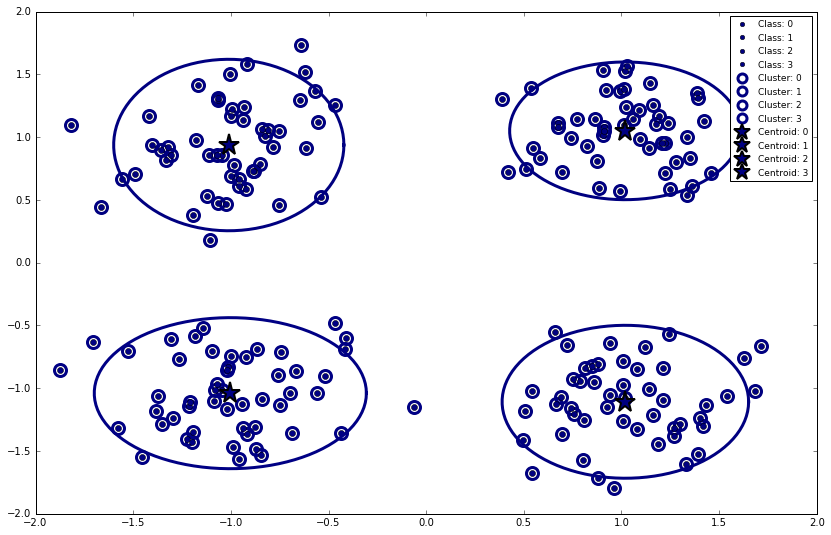

In [3]:
# Number of clusters
K = 4
cov_type = 'diag' # type of covariance, you can try out 'diag' as well
reps = 1                
# number of fits with different initalizations, best result will be kept
# Fit Gaussian mixture model
gmm = GaussianMixture(n_components=K, covariance_type=cov_type, n_init=reps).fit(X)
cls = gmm.predict(X)    

# extract cluster labels
cds = gmm.means_        

# extract cluster centroids (means of gaussians)
covs = gmm.covariances_      

# extract cluster shapes (covariances of gaussians)
if cov_type == 'diag':    
    new_covs = np.zeros([K,M,M])    

count = 0    
for elem in covs:        
    temp_m = np.zeros([M,M])        
    for i in range(len(elem)):            
        temp_m[i][i] = elem[i]        
    
    new_covs[count] = temp_m        
    count += 1    
covs = new_covs

# Plot results:
figure(figsize=(14,9))
clusterplot(X, clusterid=cls, centroids=cds, y=y, covars=covs)
show()

In [4]:
type(covs)
#print y.shape, X.shape, covs.shape

numpy.ndarray

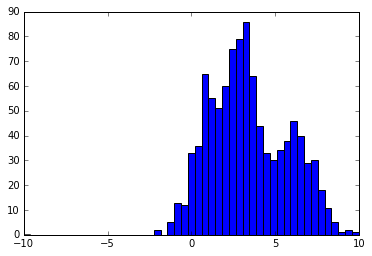

In [5]:
# exercise 11_2_1
# Number of data objects
N = 1000

# Number of attributes
M = 1

# x-values to evaluate the histogram
x = np.linspace(-10, 10, 50)

# Allocate variable for data
X = np.empty((N,M))

# Mean and covariances
m = np.array([1, 3, 6])
s = np.array([1, .5, 2])

# Draw samples from mixture of gaussians
c_sizes = np.random.multinomial(N, [1./3, 1./3, 1./3])
for c_id, c_size in enumerate(c_sizes):
    X[c_sizes.cumsum()[c_id]-c_sizes[c_id]:c_sizes.cumsum()[c_id],:] = np.random.normal(m[c_id], np.sqrt(s[c_id]), (c_size,M))


# Plot histogram of sampled data
figure()
hist(X,x)
show()

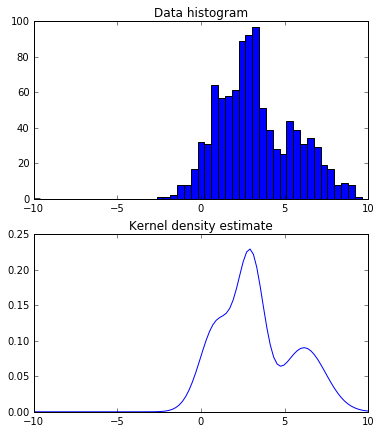

In [6]:
# exercise 11.2.100
# Draw samples from mixture of gaussians (as in exercise 11.1.1)
N = 1000
M = 1
x = np.linspace(-10, 10, 50)
X = np.empty((N,M))
m = np.array([1, 3, 6]); s = np.array([1, .5, 2])

c_sizes = np.random.multinomial(N, [1./3, 1./3, 1./3])
for c_id, c_size in enumerate(c_sizes):
    X[c_sizes.cumsum()[c_id]-c_sizes[c_id]:c_sizes.cumsum()[c_id],:] = np.random.normal(m[c_id], np.sqrt(s[c_id]), (c_size,M))


# x-values to evaluate the KDE
xe = linspace(-10, 10, 100).reshape(-1,1)

# Fit Gaussian Mixture Model to the data
K=3
gmm = GaussianMixture(n_components=K).fit(X)
gmm_estimated_density = np.exp(gmm.score_samples(xe))

# Plot kernel density estimate
figure(figsize=(6,7))
subplot(2,1,1)
hist(X,x)
title('Data histogram')
subplot(2,1,2)
plot(xe, gmm_estimated_density)
title('Kernel density estimate')
show()


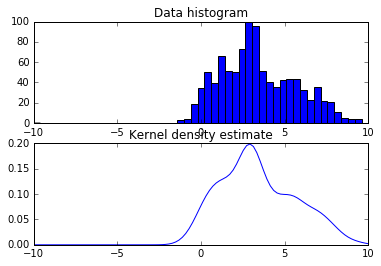

In [7]:
# exercise 11.2.2
# Draw samples from mixture of gaussians (as in exercise 11.1.1)
N = 1000; M = 1
x = np.linspace(-10, 10, 50)
X = np.empty((N,M))
m = np.array([1, 3, 6]); s = np.array([1, .5, 2])
c_sizes = np.random.multinomial(N, [1./3, 1./3, 1./3])

for c_id, c_size in enumerate(c_sizes):
    X[c_sizes.cumsum()[c_id]-c_sizes[c_id]:c_sizes.cumsum()[c_id],:] = np.random.normal(m[c_id], np.sqrt(s[c_id]), (c_size,M))


# x-values to evaluate the KDE
xe = linspace(-10, 10, 100)

# Compute kernel density estimate
kde = gaussian_kde(X.ravel())

# Plot kernel density estimate
figure()
subplot(2,1,1)
hist(X,x)
title('Data histogram')
subplot(2,1,2)
plot(xe, kde.evaluate(xe))
title('Kernel density estimate')
show()

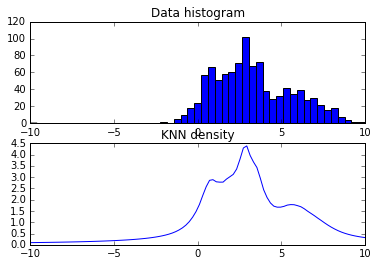

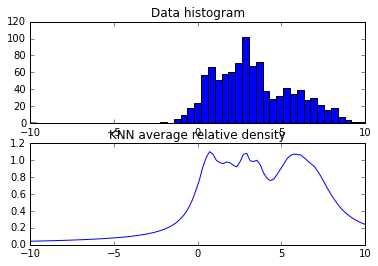

In [8]:
# exercise 11.2.3

# Draw samples from mixture of gaussians (as in exercise 11.1.1)
N = 1000; M = 1
x = np.linspace(-10, 10, 50)
X = np.empty((N,M))
m = np.array([1, 3, 6]); s = np.array([1, .5, 2])
c_sizes = np.random.multinomial(N, [1./3, 1./3, 1./3])
for c_id, c_size in enumerate(c_sizes):
    X[c_sizes.cumsum()[c_id]-c_sizes[c_id]:c_sizes.cumsum()[c_id],:] = np.random.normal(m[c_id], np.sqrt(s[c_id]), (c_size,M))


# Number of neighbors
K = 200

# x-values to evaluate the KNN
xe = linspace(-10, 10, 100)

# Find the k nearest neighbors
knn = NearestNeighbors(n_neighbors=K).fit(X)
D, i = knn.kneighbors(np.matrix(xe).T)

# Compute the density
#D, i = knclassifier.kneighbors(np.matrix(xe).T)
knn_density = 1./(D.sum(axis=1)/K)

# Compute the average relative density
DX, iX = knn.kneighbors(X)
knn_densityX = 1./(DX[:,1:].sum(axis=1)/K)
knn_avg_rel_density = knn_density/(knn_densityX[i[:,1:]].sum(axis=1)/K)


# Plot KNN density
figure()
subplot(2,1,1)
hist(X,x)
title('Data histogram')
subplot(2,1,2)
plot(xe, knn_density)
title('KNN density')
# Plot KNN average relative density
figure()
subplot(2,1,1)
hist(X,x)
title('Data histogram')
subplot(2,1,2)
plot(xe, knn_avg_rel_density)
title('KNN average relative density')

show()


The index of the lowest density object: 999


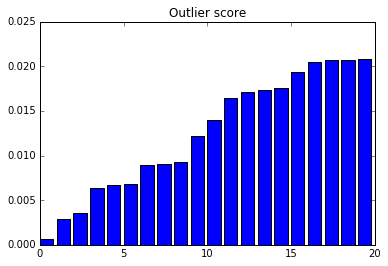

In [9]:
# exercise 11.3.1
from pylab import *
from scipy.stats.kde import gaussian_kde


# Draw samples from mixture of gaussians (as in exercise 11.1.1), add outlier
N = 1000; M = 1
x = np.linspace(-10, 10, 50)
X = np.empty((N,M))
m = np.array([1, 3, 6]); s = np.array([1, .5, 2])
c_sizes = np.random.multinomial(N, [1./3, 1./3, 1./3])
for c_id, c_size in enumerate(c_sizes):
    X[c_sizes.cumsum()[c_id]-c_sizes[c_id]:c_sizes.cumsum()[c_id],:] = np.random.normal(m[c_id], np.sqrt(s[c_id]), (c_size,M))
X[-1,0]=-10 # added outlier


# Compute kernel density estimate
kde = gaussian_kde(X.ravel())

scores = kde.evaluate(X.ravel())
idx = scores.argsort()
scores.sort()

print('The index of the lowest density object: {0}'.format(idx[0]))

# Plot kernel density estimate
figure()
bar(range(20),scores[:20])
title('Outlier score')
show()


Optimal estimated width is: 512.0
Lowest density: [ 0.01689023] for data object: 674


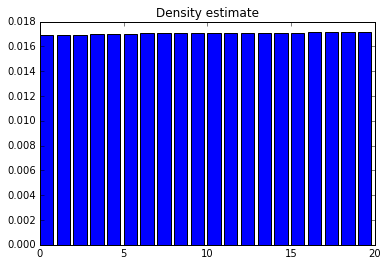

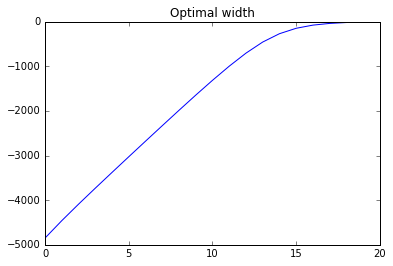

In [33]:
# exercise 11.3.2
# Draw samples from mixture of gaussians (as in exercise 11.1.1)
N = 1000; M = 1
x = np.linspace(-10, 10, 50)
X = np.empty((N,M))
m = np.array([1, 3, 6]); s = np.array([1, .5, 2])
c_sizes = np.random.multinomial(N, [1./3, 1./3, 1./3])
for c_id, c_size in enumerate(c_sizes):
    X[c_sizes.cumsum()[c_id]-c_sizes[c_id]:c_sizes.cumsum()[c_id],:] = np.random.normal(m[c_id], np.sqrt(s[c_id]), (c_size,M))



# Estimate the optimal kernel density width, by leave-one-out cross-validation
widths = 2.0**np.arange(-10,10)
logP = np.zeros(np.size(widths))
for i,w in enumerate(widths):
    f, log_f = gausKernelDensity(X, w)
    logP[i] = log_f.sum()
val = logP.max()
ind = logP.argmax()

width=widths[ind]
print('Optimal estimated width is: {0}'.format(width))

# Estimate density for each observation not including the observation
# itself in the density estimate
density, log_density = gausKernelDensity(X, width)

# Sort the densities
i = (density.argsort(axis=0)).ravel()
density = density[i]

# Display the index of the lowest density data object
print('Lowest density: {0} for data object: {1}'.format(density[0],i[0]))

# Plot density estimate of outlier score
figure(1)
bar(range(20),density[:20])
title('Density estimate')
figure(2)
plot(logP)
title('Optimal width')
show()


toolbox_02450.py:561: RuntimeWarning: divide by zero encountered in log
  log_density = -log(N-1)-M/2*np.log(2*np.pi*width)+np.log(sQ)


Optimal estimated width is: 0.194227180712


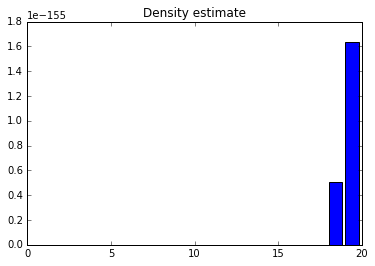

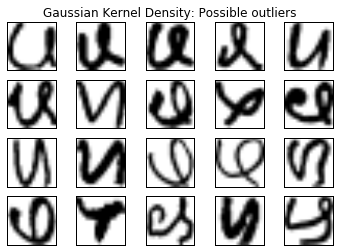

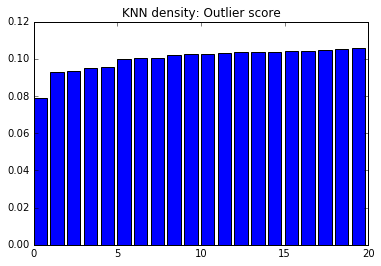

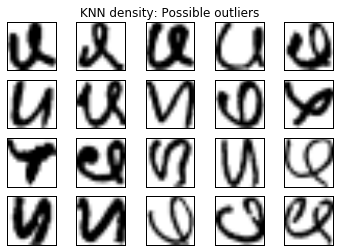

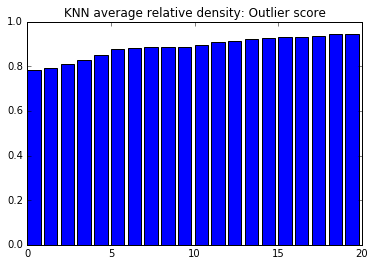

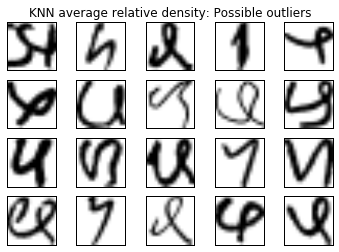

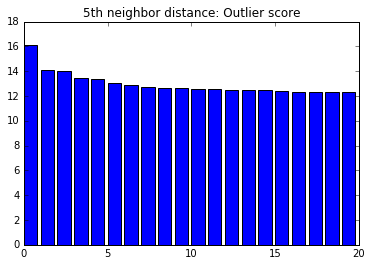

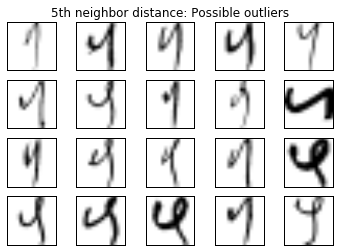

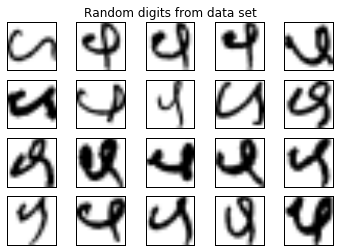

In [34]:
# exercise 11.4.1

# load data from Matlab data file
matdata = loadmat('Data/digits.mat')
X = np.matrix(matdata['X'])
y = np.matrix(matdata['y'])
N, M = np.shape(X)

# Restrict the data to images of "2"
X = X[y.A.ravel()==2,:]
N, M = np.shape(X)

### Gausian Kernel density estimator
# cross-validate kernel width by leave-one-out-cross-validation
# (efficient implementation in gausKernelDensity function)
# evaluate for range of kernel widths
widths = X.var(axis=0).max() * (2.0**np.arange(-10,3))

logP = np.zeros(np.size(widths))
for i,w in enumerate(widths):
    density, log_density = gausKernelDensity(X,w)
    logP[i] = log_density.sum()
val = logP.max()
ind = logP.argmax()

width=widths[ind]
print('Optimal estimated width is: {0}'.format(width))

# evaluate density for estimated width
density, log_density = gausKernelDensity(X,width)

# Sort the densities
i = (density.argsort(axis=0)).ravel()
density = density[i]

# Plot density estimate of outlier score
figure(1)
bar(range(20),density[:20])
title('Density estimate')

# Plot possible outliers
figure(2)
for k in range(1,21):
    subplot(4,5,k)
    imshow(np.reshape(X[i[k],:], (16,16)).T, cmap=cm.binary)
    xticks([]); yticks([])
    if k==3: title('Gaussian Kernel Density: Possible outliers')



### K-neighbors density estimator
# Neighbor to use:
K = 5

# Find the k nearest neighbors
knn = NearestNeighbors(n_neighbors=K).fit(X)
D, i = knn.kneighbors(X)

density = 1./(D.sum(axis=1)/K)

# Sort the scores
i = density.argsort()
density = density[i]

# Plot k-neighbor estimate of outlier score (distances)
figure(3)
bar(range(20),density[:20])
title('KNN density: Outlier score')
# Plot possible outliers
figure(4)
for k in range(1,21):
    subplot(4,5,k)
    imshow(np.reshape(X[i[k],:], (16,16)).T, cmap=cm.binary)
    xticks([]); yticks([])
    if k==3: title('KNN density: Possible outliers')



### K-nearest neigbor average relative density
# Compute the average relative density

knn = NearestNeighbors(n_neighbors=K).fit(X)
D, i = knn.kneighbors(X)
density = 1./(D.sum(axis=1)/K)
avg_rel_density = density/(density[i[:,1:]].sum(axis=1)/K)

# Sort the avg.rel.densities
i_avg_rel = avg_rel_density.argsort()
avg_rel_density = avg_rel_density[i_avg_rel]

# Plot k-neighbor estimate of outlier score (distances)
figure(5)
bar(range(20),avg_rel_density[:20])
title('KNN average relative density: Outlier score')
# Plot possible outliers
figure(6)
for k in range(1,21):
    subplot(4,5,k)
    imshow(np.reshape(X[i_avg_rel[k],:], (16,16)).T, cmap=cm.binary)
    xticks([]); yticks([])
    if k==3: title('KNN average relative density: Possible outliers')



### Distance to 5'th nearest neighbor outlier score
K = 5

# Find the k nearest neighbors
knn = NearestNeighbors(n_neighbors=K).fit(X)
D, i = knn.kneighbors(X)

# Outlier score
score = D[:,K-1]
# Sort the scores
i = score.argsort()
score = score[i[::-1]]

# Plot k-neighbor estimate of outlier score (distances)
figure(7)
bar(range(20),score[:20])
title('5th neighbor distance: Outlier score')
# Plot possible outliers
figure(8)
for k in range(1,21):
    subplot(4,5,k)
    imshow(np.reshape(X[i[k],:], (16,16)).T, cmap=cm.binary); 
    xticks([]); yticks([])
    if k==3: title('5th neighbor distance: Possible outliers')



# Plot random digits (the first 20 in the data set), for comparison
figure(9)
for k in range(1,21):
    subplot(4,5,k);
    imshow(np.reshape(X[k,:], (16,16)).T, cmap=cm.binary); 
    xticks([]); yticks([])
    if k==3: title('Random digits from data set')    
show()



In [24]:
import sklearn.preprocessing as pr

In [25]:
pr.binarize(X)

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
      